<a href="https://colab.research.google.com/github/mohannadrateb/trend_topic_recognition/blob/main/n_beats_no_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install darts

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
series_ai = pd.read_csv('ai_count_no_ouliers.csv')


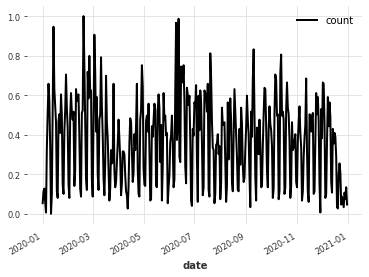

In [5]:
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
scaler_ai_retweet = Scaler()

series_ai_count = scaler_ai_retweet.fit_transform(
        TimeSeries.from_dataframe(
            series_ai, 'date', ['count'])
    ) 
series_ai_count.plot(label ='count')

plt.legend();

In [6]:
train_tweet_count, val_tweet_count = series_ai_count.split_after(pd.Timestamp('20200930'))

In [7]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [8]:
model_ai = NBEATSModel(input_chunk_length=60, output_chunk_length=7, n_epochs=100, random_state=0,
                                           )
model_ai.fit([train_tweet_count],val_series = [val_tweet_count], verbose=True)
pred_ai = model_ai.predict(n=36, series = train_tweet_count )
#pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_tweet = mape(val_tweet_count[:36],pred_ai)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the retweet for the multiple:",error_tweet )

[2021-10-06 12:59:09,077] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-10-06 12:59:09,077] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-10-06 12:59:09,238] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-06 12:59:09,238] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:03<05:57,  3.61s/it]

 11%|█         | 11/100 [00:26<03:32,  2.39s/it]

 21%|██        | 21/100 [01:09<07:22,  5.60s/it]

 31%|███       | 31/100 [01:46<04:15,  3.71s/it]

 41%|████      | 41/100 [02:22<02:57,  3.01s/it]

 51%|█████     | 51/100 [03:00<02:57,  3.62s/it]

 61%|██████    | 61/100 [03:35<02:17,  3.54s/it]

 71%|███████   | 71/100 [04:03<01:04,  2.23s/it]

 81%|████████  | 81/100 [04:23<00:38,  2.04s/it]

 91%|█████████ | 91/100 [04:43<00:18,  2.02s/it]

100%|██████████| 100/100 [05:04<00:00,  3.05s/it]

this is the error for the retweet for the multiple: 36.80811405431139


MAPE = 36.81%


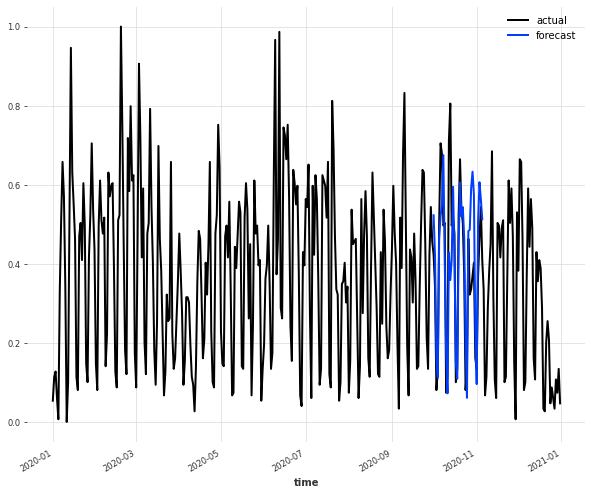

In [12]:

series_ai_count.plot(label='actual')
#val_retweet.plot(label= 'validation')
plt.rcParams['figure.figsize'] = [10, 8]
pred_ai.plot(label='forecast')
plt.legend();

print('MAPE = {:.2f}%'.format(mape(series_ai_count, pred_ai)))